<a href="https://colab.research.google.com/github/SteffanBurnette/ML-Stuff/blob/main/Statistical_Concepts_on_Real_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Main Goal
To incooperate/implement staticstical theories/models on a dataset in real time so that I can become confortable with using them in my Machine learning process.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## The Dataset
The datset that I will be working on is the Shopping Trends And Customer Behaviour Dataset freely avaliable on the kaggle website (https://www.kaggle.com/datasets/sahilislam007/shopping-trends-and-customer-behaviour-dataset).

 This dataset provides a detailed snapshot of online shopping behavior and consumer trends. It contains synthetic yet realistic customer profiles with various features like age, gender, purchase categories, payment preferences, and engagement with promotional offers.

The dataset is ideal for ** exploratory data analysis, customer segmentation, behavioral modeling**, and **recommendation systems**. It can also be used for **supervised learning** tasks such as **purchase prediction** or **churn analysis**.



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahilislam007/shopping-trends-and-customer-behaviour-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/shopping-trends-and-customer-behaviour-dataset


In [5]:
df = pd.read_csv("/kaggle/input/shopping-trends-and-customer-behaviour-dataset/Shopping Trends And Customer Behaviour Dataset.csv")
df.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## The Categories
The dataset contains 18 categories that gives details on the consumers demographic and their purchasing habbits. On intial inspection I see two categories that seems like they can be removed as they seem to offer irrelevant/uniformed data that can become noise in the trainign process (Unamed:0, Customer ID).

The **Categories**:
* Unnamed:0 --> Numeric
* Customer ID --> Numeric
* Age --> Numeric
* Gender -->Text (binary)
* Item Purchased --> Text (categorical)
* Category --> Text (categorical)
* Purchase Amount(USD) --> Numeric
* Location -->Text (categorical)
* Color --> Text (categorical)
* Season --> Text (categorical)
* Review Rating --> Numeric
* Subscription Status --> Text (binary)
* Shipping Type --> Text (categorical)
* Discount Applied --> Text (binary)
* Promo Code Used  --> Text (binary)
* Previous Purchases  --> Numeric
* Payment Method --> Text (categorical)
* Frequency of Purchases --> Text (categorical)

After looking at the type of data that each category holds, I will have to convert some categories into numeric representations and might have to normalize other numeric categories depending on what algorithm I choose to implement.

## Visualizig the Data
Before I decide to do anything, I would like to visulaize the categories to see if there are any immediate trends that I can identify that might give me an idea on how I should approach tackling this dataset.

Text(0.5, 0, 'Age of Customers')

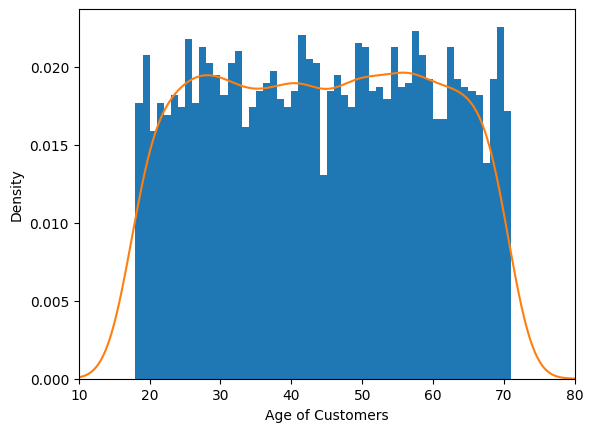

In [8]:
ax = df['Age'].plot.hist(density = True, xlim = [10, 80], bins = range(10, 80))
df['Age'].plot.density(ax = ax)
ax.set_xlabel('Age of Customers')

The the **desity plot** the Age category seems to be evenly distributed.

Text(0.5, 0, 'Review Ratings')

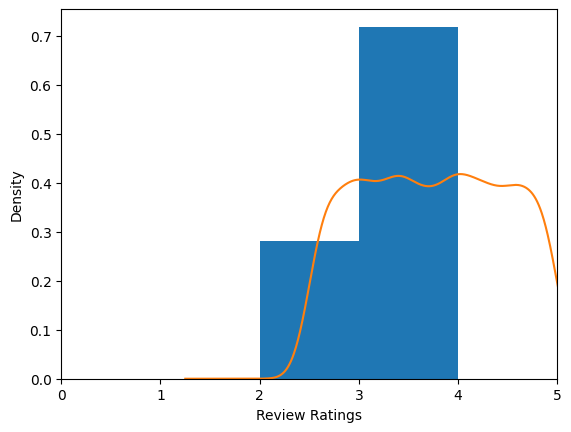

In [15]:
ax = df['Review Rating'].plot.hist(density = True, xlim = [0, 5], bins = range(0, 5))
df['Review Rating'].plot.density(ax = ax)
ax.set_xlabel('Review Ratings')

A majority of the ratings seems to lie between 3-4 stars

Text(0.5, 0, 'Purchase Amount(USD)')

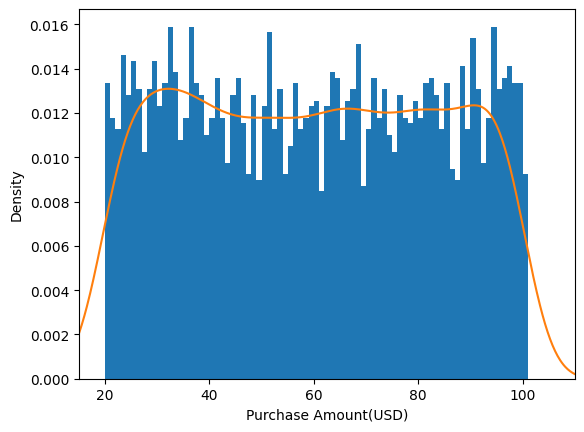

In [18]:
ax = df['Purchase Amount (USD)'].plot.hist(density = True, xlim = [15, 110], bins = range(15, 110))
df['Purchase Amount (USD)'].plot.density(ax = ax)
ax.set_xlabel('Purchase Amount(USD)')

There seems to be some **outliers** in the purchase amount category so i may be benificial to compute the **trimmed mean** to get a proper estimate of the **average**.

Text(0.5, 0, 'Previous Purchases')

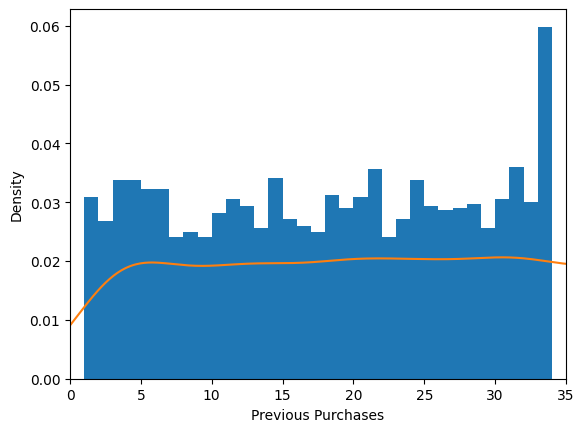

In [62]:
ax = df['Previous Purchases'].plot.hist(density = True, xlim = [0, 35], bins = range(0, 35))
df['Previous Purchases'].plot.density(ax = ax)
ax.set_xlabel('Previous Purchases')

There also appears to be soime outliers in the **Previous Purchases**  category aswell.

In [21]:
df.describe()

,Unnamed: 0,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1949.500000,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,1125.977353,15.207589,23.685392,0.716223,14.447125
min,0.000000,1.000000,18.000000,20.000000,2.500000,1.000000
25%,974.750000,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1949.500000,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2924.250000,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3899.000000,3900.000000,70.000000,100.000000,5.000000,50.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3900 non-null   int64  
 1   Customer ID             3900 non-null   int64  
 2   Age                     3900 non-null   int64  
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

There seems to be no missing features in the dataset.

In [23]:
new_df = df.drop(['Unnamed: 0', 'Customer ID'], axis = 'columns')
new_df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Dropped the two **irrelevant** categories so that they dont introduce **noise**.

## Preprocessing
Now before I can do more I will need to preprocess the text data within the dataset so that the machine learning algorithms can interpret them.

In [29]:
print(new_df['Category'].value_counts)

<bound method IndexOpsMixin.value_counts of 0          Clothing
1          Clothing
2          Clothing
3          Footwear
4          Clothing
           ...     
3895       Clothing
3896    Accessories
3897    Accessories
3898       Footwear
3899    Accessories
Name: Category, Length: 3900, dtype: object>


In [47]:
print(f"Category: \n{new_df['Category'].unique()} \n")
print(f"Gender: \n{new_df['Gender'].unique()} \n")
print(f"Item Purchased: \n{new_df['Item Purchased'].unique()} \n")
print(f"Location: \n{new_df['Location'].unique()} \n")
print(f"Color: \n{new_df['Color'].unique()} \n")
print(f"Season: \n{new_df['Season'].unique()} \n")
print(f"Subscription Status: \n{new_df['Subscription Status'].unique()} \n")
print(f"Shipping Type: \n{new_df['Shipping Type'].unique()} \n")
print(f"Discount Applied: \n{new_df['Discount Applied'].unique()} \n")
print(f"Promo Code Used: \n{new_df['Promo Code Used'].unique()} \n")
print(f"Payment Method: \n{new_df['Payment Method'].unique()} \n")
print(f"Frequency of Purchases: \n{new_df['Frequency of Purchases'].unique()} \n")

Category: 
['Clothing' 'Footwear' 'Outerwear' 'Accessories'] 

Gender: 
['Male' 'Female'] 

Item Purchased: 
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves'] 

Location: 
['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michigan'] 

Color: 
['Gray' 'Maroon' 'Turquoise' 'White' 'Charcoal' 'Silver' 'P

Upon inspection of the text data unique values the columns **Discount Applied** and **Promo Code Used** seems to be redundant since they both imply the same thing. If the values are one to one with one another than I will be able to remove one column (since it would technically be considered a duplicate).

In [48]:
print(df['Discount Applied'].equals(df['Promo Code Used']))

True


Seems like my suspison was correct, both columns do share the same values and imply the same characteristic, therefore both are not needed.

In [50]:
new_df.drop('Promo Code Used', axis = 'columns', inplace = True)
#With inplace = True it removes the column but does not return a new dataframe object

KeyError: "['Promo Code Used'] not found in axis"

In [53]:
new_df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually


## Encoding the non-numeric data
The next step now will be to convert the text data to numeric data so that it can be fed to the machine learning algorithm. The encoder that will be used is the **OneHotEncoder**. The reason as to why I'm choosing to go with the **OneHotEncoder** is because the text data values dont seem to have any ordered/sorted structure that would benefit from it being numbered one after the other. If there was a column that had user experience (good, average, bad for instance) then order could be taken into account (even then its not a necessity).

In [56]:
from sklearn.preprocessing import OneHotEncoder

#Apply get_dummies to multiple columns
df_dummies = pd.get_dummies(new_df, columns=['Gender', 'Item Purchased', 'Category',
                                         'Purchase Amount (USD)', 'Location', 'Color', 'Season', 'Subscription Status',
                                         'Shipping Type', 'Discount Applied', 'Payment Method', 'Frequency of Purchases'], dtype = int)
print(df_dummies)

      Age  Review Rating  Previous Purchases  Gender_Female  Gender_Male  \
0      55            3.1                  14              0            1   
1      19            3.1                   2              0            1   
2      50            3.1                  23              0            1   
3      21            3.5                  49              0            1   
4      45            2.7                  31              0            1   
...   ...            ...                 ...            ...          ...   
3895   40            4.2                  32              1            0   
3896   52            4.5                  41              1            0   
3897   46            2.9                  24              1            0   
3898   44            3.8                  24              1            0   
3899   52            3.1                  33              1            0   

      Item Purchased_Backpack  Item Purchased_Belt  Item Purchased_Blouse  \
0         

In [57]:
df_dummies.head()

,Age,Review Rating,Previous Purchases,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,3.1,14,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,19,3.1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,50,3.1,23,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,21,3.5,49,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,45,2.7,31,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


Text(0.5, 0, 'Females')

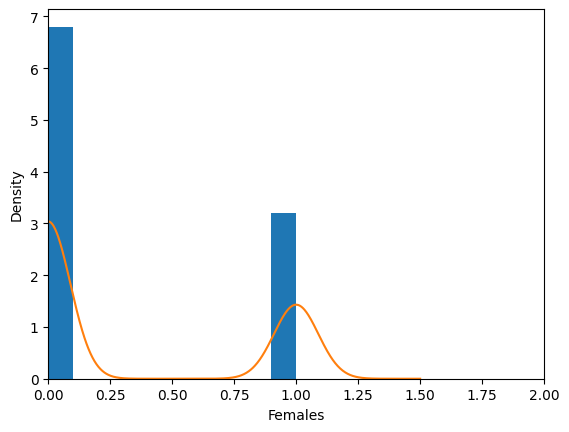

In [65]:
ax = df_dummies['Gender_Female'].plot.hist(density = True, xlim = [0, 2] )
df_dummies['Gender_Female'].plot.density(ax = ax)
ax.set_xlabel('Females')

Text(0.5, 0, 'Males')

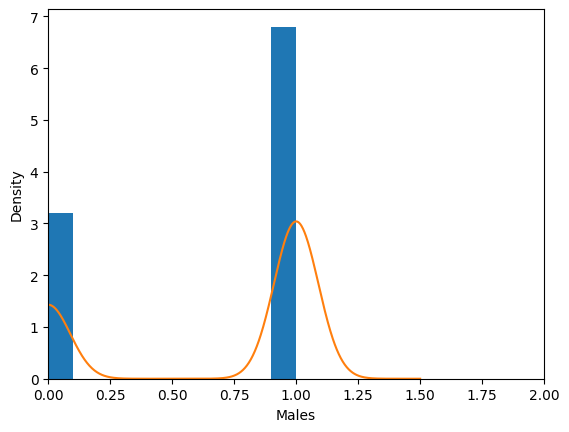

In [63]:
ax = df_dummies['Gender_Male'].plot.hist(density = True, xlim = [0, 2] )
df_dummies['Gender_Male'].plot.density(ax = ax)
ax.set_xlabel('Males')

## Estimates of Location
Now I will now look at some statistical metrics to get an idea of where most of the data lays for certain categories.

In [69]:
from scipy.stats import trim_mean
print(f"Age Mean: {df_dummies['Age'].mean()}")
print(f"Age Trimmed Mean: {trim_mean(df_dummies['Age'], 0.1)}")
print(f"Age Median: {df_dummies['Age'].median()}")

Age Mean: 44.06846153846154
Age Trimmed Mean: 44.07532051282051
Age Median: 44.0


In [70]:
print(f"Review Rating Mean: {df_dummies['Review Rating'].mean()}")
print(f"Review Rating Trimmed Mean: {trim_mean(df_dummies['Review Rating'], 0.1)}")
print(f"Review Rating Median: {df_dummies['Review Rating'].median()}")

Review Rating Mean: 3.7499487179487176
Review Rating Trimmed Mean: 3.7496153846153844
Review Rating Median: 3.7


In [71]:
print(f"Previous Purchases Mean: {df_dummies['Previous Purchases'].mean()}")
print(f"Previous Purchases Trimmed Mean: {trim_mean(df_dummies['Previous Purchases'], 0.1)}")
print(f"Previous Purchases Median: {df_dummies['Previous Purchases'].median()}")

Previous Purchases Mean: 25.35153846153846
Previous Purchases Trimmed Mean: 25.33653846153846
Previous Purchases Median: 25.0


## Estimates of Variablility
Will now look at the dispersion of values in the categories.

In [83]:
import statsmodels.api as sm

print(f"Standard Deviation: {df_dummies['Age'].std()}")
print(f"Interquartile Range (IQR): {df_dummies['Age'].quantile(0.75) - df_dummies['Age'].quantile(0.25)}")
print(f"Median Absolute Deviation(MAD): {sm.robust.scale.mad(df_dummies['Age'])}")
print(f"25th Percentile: {df_dummies['Age'].quantile(0.25)}")
print(f"50th Percentile: {df_dummies['Age'].quantile(0.5)}")
print(f"75th Percentile: {df_dummies['Age'].quantile(0.75)}")

Standard Deviation: 15.20758912716238
Interquartile Range (IQR): 26.0
Median Absolute Deviation(MAD): 19.273828840572826
25th Percentile: 31.0
50th Percentile: 44.0
75th Percentile: 57.0


In [84]:
print(f"Standard Deviation: {df_dummies['Review Rating'].std()}")
print(f"Interquartile Range (IQR): {df_dummies['Review Rating'].quantile(0.75) - df_dummies['Review Rating'].quantile(0.25)}")
print(f"Median Absolute Deviation(MAD): {sm.robust.scale.mad(df_dummies['Review Rating'])}")
print(f"25th Percentile: {df_dummies['Review Rating'].quantile(0.25)}")
print(f"50th Percentile: {df_dummies['Review Rating'].quantile(0.5)}")
print(f"75th Percentile: {df_dummies['Review Rating'].quantile(0.75)}")

Standard Deviation: 0.7162228139312449
Interquartile Range (IQR): 1.3000000000000003
Median Absolute Deviation(MAD): 0.8895613311033613
25th Percentile: 3.1
50th Percentile: 3.7
75th Percentile: 4.4


In [85]:
print(f"Standard Deviation: {df_dummies['Previous Purchases'].std()}")
print(f"Interquartile Range (IQR): {df_dummies['Previous Purchases'].quantile(0.75) - df_dummies['Previous Purchases'].quantile(0.25)}")
print(f"Median Absolute Deviation(MAD): {sm.robust.scale.mad(df_dummies['Previous Purchases'])}")
print(f"25th Percentile: {df_dummies['Previous Purchases'].quantile(0.25)}")
print(f"50th Percentile: {df_dummies['Previous Purchases'].quantile(0.5)}")
print(f"75th Percentile: {df_dummies['Previous Purchases'].quantile(0.75)}")

Standard Deviation: 14.447125170462431
Interquartile Range (IQR): 25.0
Median Absolute Deviation(MAD): 17.791226622067224
25th Percentile: 13.0
50th Percentile: 25.0
75th Percentile: 38.0


## TODO:
* Correlation Coeeficient
* Stratified Sampling
* Machine Learning Algorithms
* DataProcessing Pipeline
* k-fold cross validation
* GridSearchCV / RandomSearchCV